### Polynomial Linear Regression with categorical data

Data comes from Kaggle (polynomial regression)
https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression?resource=download

Variables:
- Hours Studied: The total number of hours spent studying by each student.
- Previous Scores: The scores obtained by students in previous tests.
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
- Sleep Hours: The average number of hours of sleep the student had per day.
- Sample Question Papers Practiced: The number of sample question papers the student practiced.

Target Variable:
- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.rs

#### Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:100% !important; }<style>"))

In [4]:
dataset = pd.read_csv('Student_Performance.csv')
dataset

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


#### Separate X features & y labels

In [8]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#### Encode categorical data

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [2])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 1.0, 7, 99, 9, 1],
       [1.0, 0.0, 4, 82, 4, 2],
       [0.0, 1.0, 8, 51, 7, 2],
       ...,
       [0.0, 1.0, 6, 83, 8, 5],
       [0.0, 1.0, 9, 97, 7, 0],
       [1.0, 0.0, 7, 74, 8, 1]], dtype=object)

#### Polynomial Features

In [10]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_features = polynomial_converter.fit_transform(X)

poly_features.shape, X.shape 
#Note: we are going from 6 features to 27 features

((10000, 27), (10000, 6))

In [14]:
df2 = pd.DataFrame(data=poly_features[0], columns=['Poly_Features'])
df2

,Poly_Features
0,0.0
1,1.0
2,7.0
3,99.0
4,9.0
5,1.0
6,0.0
7,0.0
8,0.0
9,0.0


#### SPLIT into Training & Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 0)

#### TRAIN the model on Linear Regression
note that X is now turned into poly (converted & transformed) and ready for Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### VALIDATE the model

In [17]:
y_pred = model.predict(X_test)

new_df = pd.DataFrame({'y_pred': y_pred.round(1), 'y_test': y_test })
new_df

,y_pred,y_test
0,50.4,53.0
1,53.0,50.0
2,78.1,80.0
3,25.3,24.0
4,67.5,64.0
...,...,...
1995,90.9,91.0
1996,41.7,42.0
1997,64.5,66.0
1998,25.7,27.0


#### EVALUATE the Model

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(new_df['y_test'], new_df['y_pred']).round(5)
mse = mean_squared_error(new_df['y_test'], new_df['y_pred']).round(5)
rmse = np.sqrt(mse).round(5)

r2 = r2_score(new_df['y_test'], new_df['y_pred']).round(7)

n = X.shape[0]
k = X.shape[1]
r2_adj = round((1-(1-r2)*(n-1)/(n-k-1)),7)

print(f"Mean Absolute Error: {mae}")

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error Error: {rmse}")

print(f"R2: {r2}")
print(f"R2 adjusted: {r2_adj}")

intercept = model.intercept_
print(f"Intercept: {intercept}. Again this is negative, why?")


Mean Absolute Error: 1.63185
Mean Squared Error: 4.14462
Root Mean Squared Error Error: 2.03583
R2: 0.9879553
R2 adjusted: 0.9879481
Intercept: -32.77828158107462. Again this is negative, why?


MAE, MSE and RMSE are small values that's good, but the model is punishing us as there is a difference between MSE and RMSE. 

R squared and R sq adjusted come pretty high and both are close to each other. This is very good model.


<span style="text-decoration: underline;">On the Linear Regression we got:</span>

- Mean Absolute Error: 1.62215
- Mean Squared Error: 4.1012
- Root Mean Squared Error: 2.02514
- R2: 0.9880814
- R2 adjusted: 0.9880742
- Intercept: -33.742556490415765, why is this negative?

Interesting, comparing Linear vs Polynomial, they both performed about the same, but just for a touch looks like the Linear Regression is better. In Poly model MAE, MSE, RMSE metrics went up, and R2 and R2 adjusted went down. But still overall a good model. 

In [ ]:
#Scatter Plot
plt.scatter(new_df['y_test'], new_df['y_pred'], alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.title('Actual vs Predicted')
plt.show()

#### PREDICT

In [22]:
# New students
predicted_sales = model.predict(polynomial_converter.fit_transform(([[0, 1, 4.99, 69.44, 6.5, 4.6]])))
predicted_sales 

array([55.46994582])

If a student does not participare in Extracurricular Act., studies for 4.99 hours, have previously scored 69.44, slept for 6.5 hours and have practiced 4.6 sample questions, then his/hers final performance would be 55.46 (vs. the 55.53 on Linear Regression)

#### Lets see which degree of power is best

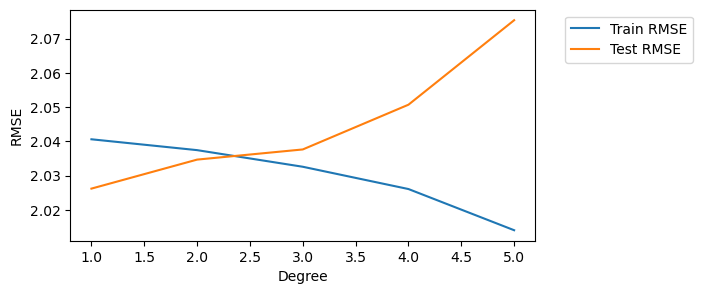

In [23]:
train_rmse_error = []
test_rmse_error = []

for degree in range(1, 10):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)  #Create PolyFeatures
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.2, random_state = 0) # split poly features into train/test
    
    model = LinearRegression()
    model.fit(X_train, y_train)# fit model on training data
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_error.append(train_rmse)# store/save the rmse for both training and test set
    test_rmse_error.append(test_rmse)  # store/save the rmse for both training and test set


# plot the results (error vs poly order)
plt.figure(figsize=(6, 3))
plt.plot(range(1,6), train_rmse_error[:5], label='Train RMSE')
plt.plot(range(1,6), test_rmse_error[:5], label='Test RMSE')

plt.ylabel('RMSE')
plt.xlabel('Degree')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It looks like between 2 and 2.5 is the best degree to use.

Can't use 3 as the test error goes up significantly.